<a href="https://colab.research.google.com/github/CorhuilaDev/reto/blob/main/Reto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se hace la carga del archivo que se va a entrenar, se toma una muestra de 41276 registros

In [1]:
from google.colab import files
uploaded=files.upload()


se almacena los datos con pandas en la variable datos, y se muestra que hayan cargado

In [ ]:
import io
import pandas as pd
datos = pd.read_csv(io.BytesIO(uploaded['datos2.csv']))

datos

,id,cuenta,periodo,totalactiva,clase,estrato,municipio,ciclo,ubicacion
0,1,D816B37FCE924B570E04F67BEDED80CA,2,10850,Alumbrado Regulado,0,ALTAMIRA,38,U
1,2,3DCAA9A3BB94316AC6059871B7308108,2,15323,Alumbrado Regulado,0,SUAZA,38,U
2,3,83B7CFD6CFFA47E9FA22446DF12E7719,2,10401,Alumbrado Regulado,0,AGRADO,38,U
3,4,0CA7B651EF0A1F0A38BBB3466574F5ED,2,134,Alumbrado Regulado,0,GARZON,38,U
4,5,DF44A1F150454E6353938530372FA3DD,2,135,Alumbrado Regulado,0,GUADALUPE,38,U
...,...,...,...,...,...,...,...,...,...
10364,29495,ABA6F864CDB01704B88DEBB01475DD89,3,55,Comercial,0,SAN AGUSTIN,54,R
10365,29496,2A2EE3AAD4D23A277D8EBCD8589633C9,3,797,Comercial,0,TELLO,80,U
10366,29497,891EAF14845C7B3584CB7ECEEB8E5242,3,1201,Comercial,0,IQUIRA,80,U
10367,29498,512254DCE822057A7C09AC81EBEA7004,3,1,Comercial,0,TERUEL,21,U


luego se muestra la informacion de los datos, donde nos muestra la cantidad de columnas, y tipo de datos qeu encontramos, y si hay columnas con valores nulos 

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10369 entries, 0 to 10368
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           10369 non-null  int64 
 1   cuenta       10369 non-null  object
 2   periodo      10369 non-null  int64 
 3   totalactiva  10369 non-null  int64 
 4   clase        10369 non-null  object
 5   estrato      10369 non-null  int64 
 6   municipio    10369 non-null  object
 7   ciclo        10369 non-null  int64 
 8   ubicacion    10369 non-null  object
dtypes: int64(5), object(4)
memory usage: 729.2+ KB


hacemos una descripcion de los datos numericos, desde un punto de vista estadistico

In [ ]:
datos.describe()

,id,periodo,totalactiva,estrato,ciclo
count,10369.000000,10369.000000,10369.000000,10369.000000,10369.000000
mean,18234.808468,2.033851,1595.270325,0.147362,35.987077
std,9602.376661,0.809325,5396.705186,0.714626,25.044644
min,1.000000,1.000000,1.000000,0.000000,2.000000
25%,10356.000000,1.000000,68.000000,0.000000,15.000000
50%,20336.000000,2.000000,217.000000,0.000000,31.000000
75%,26907.000000,3.000000,700.000000,0.000000,58.000000
max,29499.000000,3.000000,96933.000000,6.000000,129.000000


vamos y graficamos un histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7e3175c10>,
      dtype=object)

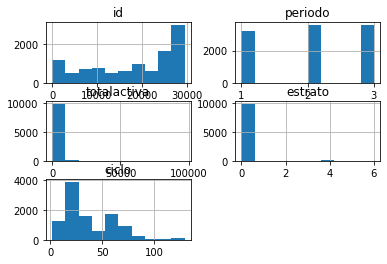

In [ ]:
datos.hist()

limpiamos los datos y seleccionamos las columnas que vamos a eliminar

In [ ]:
datos= datos.drop(columns=['id'])


In [ ]:
datos

,cuenta,periodo,totalactiva,clase,estrato,municipio,ciclo,ubicacion
0,D816B37FCE924B570E04F67BEDED80CA,01/02/10,10850,Alumbrado Regulado,0,ALTAMIRA,38,U
1,3DCAA9A3BB94316AC6059871B7308108,01/02/10,15323,Alumbrado Regulado,0,SUAZA,38,U
2,83B7CFD6CFFA47E9FA22446DF12E7719,01/02/10,10401,Alumbrado Regulado,0,AGRADO,38,U
3,0CA7B651EF0A1F0A38BBB3466574F5ED,01/02/10,134,Alumbrado Regulado,0,GARZON,38,U
4,DF44A1F150454E6353938530372FA3DD,01/02/10,135,Alumbrado Regulado,0,GUADALUPE,38,U
...,...,...,...,...,...,...,...,...
41271,D254EB704B818C2969E71B8025830855,01/12/10,263,Comercial,0,BARAYA,22,U
41272,EF07480FB64A7E4F76585DCFA17C3CB4,01/12/10,5317,Comercial,0,NEIVA,81,U
41273,B62FEF1941AA938D00800484A0568CF2,01/12/10,1950,Comercial,0,NEIVA,81,U
41274,85B0948C7208035C25875D0B1F3F9EAB,01/12/10,108,Comercial,0,PITALITO,57,U


preparamos los datos de nuevo, y verificamos que no hayan nulos

In [ ]:
datos.isna().sum()

cuenta         0
periodo        0
totalactiva    0
clase          0
estrato        0
municipio      0
ciclo          0
ubicacion      0
dtype: int64

In [ ]:
datos['clase'].unique()

array(['Alumbrado Regulado', 'Bombeo de agua', 'Residencial',
       'No Regulado Alumbrado', 'Autoconsumo', 'Comercial'], dtype=object)

reemplazamos los valores de clase por valores numericos

In [ ]:
valores_reemplazo ={"clase":{'Alumbrado Regulado':1, 'Bombeo de agua':2, 'Residencial':3,'No Regulado Alumbrado':4, 'Autoconsumo':5, 'Comercial':6}}
datos.replace(valores_reemplazo, inplace=True)
datos

,cuenta,periodo,totalactiva,clase,estrato,municipio,ciclo,ubicacion
0,D816B37FCE924B570E04F67BEDED80CA,2,10850,1,0,ALTAMIRA,38,U
1,3DCAA9A3BB94316AC6059871B7308108,2,15323,1,0,SUAZA,38,U
2,83B7CFD6CFFA47E9FA22446DF12E7719,2,10401,1,0,AGRADO,38,U
3,0CA7B651EF0A1F0A38BBB3466574F5ED,2,134,1,0,GARZON,38,U
4,DF44A1F150454E6353938530372FA3DD,2,135,1,0,GUADALUPE,38,U
...,...,...,...,...,...,...,...,...
10364,ABA6F864CDB01704B88DEBB01475DD89,3,55,6,0,SAN AGUSTIN,54,R
10365,2A2EE3AAD4D23A277D8EBCD8589633C9,3,797,6,0,TELLO,80,U
10366,891EAF14845C7B3584CB7ECEEB8E5242,3,1201,6,0,IQUIRA,80,U
10367,512254DCE822057A7C09AC81EBEA7004,3,1,6,0,TERUEL,21,U


In [ ]:
datos['municipio'].unique()

array(['ALTAMIRA', 'SUAZA', 'AGRADO', 'GARZON', 'GUADALUPE', 'GIGANTE',
       'BARAYA', 'ALGECIRAS', 'EL PITAL', 'IQUIRA', 'PALERMO', 'TELLO',
       'VILLAVIEJA', 'YAGUARA', 'TERUEL', 'HOBO', 'RIVERA', 'SANTAMARIA',
       'CAMPOALEGRE', 'COLOMBIA', 'SAN VICENTE DEL CAGUAN', 'AIPE',
       'TARQUI', 'PALESTINA', 'PITALITO', 'ELIAS', 'ISNOS',
       'SALADO BLANCO', 'OPORAPA', 'ACEVEDO', 'LA ARGENTINA', 'PAICOL',
       'BELALCAZAR PAEZ', 'NATAGA', 'TESALIA', 'LA PLATA', 'SAN AGUSTIN',
       'NEIVA', 'TIMANA'], dtype=object)

In [ ]:
municipios_reemplazo={'municipio':{'ALTAMIRA':1, 'SUAZA':2, 'AGRADO':3, 'GARZON':4, 'GUADALUPE':5, 'GIGANTE':6,
       'BARAYA':7, 'ALGECIRAS':8, 'EL PITAL':9, 'IQUIRA':10, 'PALERMO':11, 'TELLO':12,
       'VILLAVIEJA':13, 'YAGUARA':14, 'TERUEL':15, 'HOBO':16, 'RIVERA':17, 'SANTAMARIA':18,
       'CAMPOALEGRE':19, 'COLOMBIA':20, 'SAN VICENTE DEL CAGUAN':21, 'AIPE':22,
       'TARQUI':23, 'PALESTINA':24, 'PITALITO':25, 'ELIAS':26, 'ISNOS':27,
       'SALADO BLANCO':28, 'OPORAPA':29, 'ACEVEDO':30, 'LA ARGENTINA':31, 'PAICOL':32,
       'BELALCAZAR PAEZ':33, 'NATAGA':34, 'TESALIA':35, 'LA PLATA':36, 'SAN AGUSTIN':37,
       'TIMANA':38, 'NEIVA':39}}
datos.replace(municipios_reemplazo,inplace=True)
datos

,cuenta,periodo,totalactiva,clase,estrato,municipio,ciclo,ubicacion
0,D816B37FCE924B570E04F67BEDED80CA,2,10850,1,0,1,38,U
1,3DCAA9A3BB94316AC6059871B7308108,2,15323,1,0,2,38,U
2,83B7CFD6CFFA47E9FA22446DF12E7719,2,10401,1,0,3,38,U
3,0CA7B651EF0A1F0A38BBB3466574F5ED,2,134,1,0,4,38,U
4,DF44A1F150454E6353938530372FA3DD,2,135,1,0,5,38,U
...,...,...,...,...,...,...,...,...
10364,ABA6F864CDB01704B88DEBB01475DD89,3,55,6,0,37,54,R
10365,2A2EE3AAD4D23A277D8EBCD8589633C9,3,797,6,0,12,80,U
10366,891EAF14845C7B3584CB7ECEEB8E5242,3,1201,6,0,10,80,U
10367,512254DCE822057A7C09AC81EBEA7004,3,1,6,0,15,21,U


In [ ]:
datos['ubicacion'].unique()

array(['U', 'R'], dtype=object)

In [ ]:
ubicacion_reemplazo={'ubicacion':{'U':1,'R':2}}
datos.replace(ubicacion_reemplazo, inplace=True)
datos

,cuenta,periodo,totalactiva,clase,estrato,municipio,ciclo,ubicacion
0,D816B37FCE924B570E04F67BEDED80CA,2,10850,1,0,1,38,1
1,3DCAA9A3BB94316AC6059871B7308108,2,15323,1,0,2,38,1
2,83B7CFD6CFFA47E9FA22446DF12E7719,2,10401,1,0,3,38,1
3,0CA7B651EF0A1F0A38BBB3466574F5ED,2,134,1,0,4,38,1
4,DF44A1F150454E6353938530372FA3DD,2,135,1,0,5,38,1
...,...,...,...,...,...,...,...,...
10364,ABA6F864CDB01704B88DEBB01475DD89,3,55,6,0,37,54,2
10365,2A2EE3AAD4D23A277D8EBCD8589633C9,3,797,6,0,12,80,1
10366,891EAF14845C7B3584CB7ECEEB8E5242,3,1201,6,0,10,80,1
10367,512254DCE822057A7C09AC81EBEA7004,3,1,6,0,15,21,1


In [ ]:
datos['cuenta'].value_counts()

F51CD29A5490DD05B7F92A401BE0797D    33
3C7D17E848029FCFD9B725BD6741FAB3    33
40D40B71B1CDDF9518CDCA5E2480936E    33
9C800B1A2A8E295FA1727AC970E34153    33
056D642D894A6670F89F64CF7F67DE29    33
                                    ..
F5793743E3671DCF56F8346C1A330A8F     1
F88A978DC1730DD3ACD10F94862ED61D     1
311ADEDEEAFF8D1BD9846C7DAD8FF94D     1
BE0DA811993FCCDDDC270494285CDA02     1
5F012451C1C06E11BEA9288B32A343AD     1
Name: cuenta, Length: 1834, dtype: int64

In [ ]:
datos['periodo'].value_counts()

3    3577
2    3566
1    3226
Name: periodo, dtype: int64

In [ ]:
datos= datos.drop(columns=['cuenta'])


In [ ]:
datos

,periodo,totalactiva,clase,estrato,municipio,ciclo,ubicacion
0,2,10850,1,0,1,38,1
1,2,15323,1,0,2,38,1
2,2,10401,1,0,3,38,1
3,2,134,1,0,4,38,1
4,2,135,1,0,5,38,1
...,...,...,...,...,...,...,...
10364,3,55,6,0,37,54,2
10365,3,797,6,0,12,80,1
10366,3,1201,6,0,10,80,1
10367,3,1,6,0,15,21,1


vamos a contar cuantas coincidencias hay entre los municipios

In [ ]:
datos['municipio'].value_counts()

39    1017
11     729
25     615
17     611
4      498
18     446
23     386
14     377
6      356
19     355
36     347
22     291
8      282
13     275
10     237
5      236
3      224
12     221
15     206
37     196
1      187
30     185
38     181
16     178
7      166
9      160
35     153
24     141
26     135
32     132
27     125
20     120
34     115
31     113
2      109
29     102
28     100
33      32
21      30
Name: municipio, dtype: int64

graficamos municipio vs totalactiva

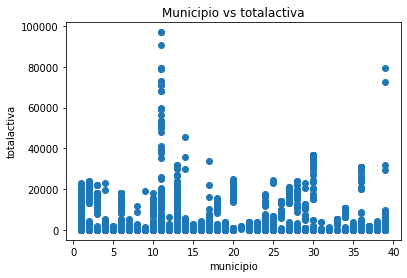

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=datos['municipio'], y=datos['totalactiva'])
plt.title('Municipio vs totalactiva')
plt.xlabel('municipio')
plt.ylabel('totalactiva')
plt.show()

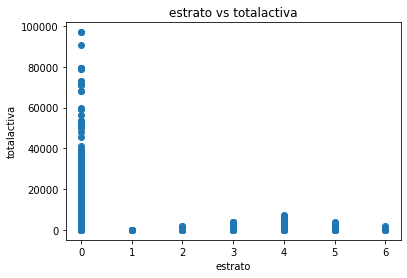

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=datos['estrato'], y=datos['totalactiva'])
plt.title('estrato vs totalactiva')
plt.xlabel('estrato')
plt.ylabel('totalactiva')
plt.show()

fase de entrenamiento

In [ ]:
datos_entrenamiento=datos.sample(frac=0.9, random_state=0)
datos_test=datos.drop(datos_entrenamiento.index)
datos_test

,periodo,totalactiva,clase,estrato,municipio,ciclo,ubicacion
0,2,10850,1,0,1,38,1
21,1,101,1,0,3,38,1
25,2,12,1,0,10,15,1
28,2,161,1,0,12,15,1
62,2,63,1,0,22,15,1
...,...,...,...,...,...,...,...
10305,3,30,6,0,39,5,1
10320,3,2,6,0,36,72,1
10327,3,17,6,0,39,5,1
10336,3,49,6,0,39,5,1


In [ ]:
datos_entrenamiento

,periodo,totalactiva,clase,estrato,municipio,ciclo,ubicacion
8489,2,186,6,0,36,76,1
8375,2,43,6,0,28,55,1
8546,2,144,6,0,34,71,1
5771,2,6227,5,0,12,2,1
3820,2,206,4,0,17,15,1
...,...,...,...,...,...,...,...
5156,3,438,4,0,32,75,1
9936,3,29,6,0,25,61,1
8177,2,10,6,0,18,21,1
6194,1,2769,5,0,10,2,1


separamos las variables predictoras de la variable qeu quiero predecir

In [ ]:
etiquetas_entrenamiento=datos_entrenamiento.pop('totalactiva')
etiquetas_test=datos_test.pop('totalactiva')
etiquetas_entrenamiento

8489     186
8375      43
8546     144
5771    6227
3820     206
        ... 
5156     438
9936      29
8177      10
6194    2769
4361    1620
Name: totalactiva, Length: 9332, dtype: int64

In [ ]:
datos_entrenamiento

,periodo,clase,estrato,municipio,ciclo,ubicacion
8489,2,6,0,36,76,1
8375,2,6,0,28,55,1
8546,2,6,0,34,71,1
5771,2,5,0,12,2,1
3820,2,4,0,17,15,1
...,...,...,...,...,...,...
5156,3,4,0,32,75,1
9936,3,6,0,25,61,1
8177,2,6,0,18,21,1
6194,1,5,0,10,2,1


entrenamos el modelo

In [ ]:
from sklearn.linear_model import LinearRegression
modelo=LinearRegression()
modelo.fit(datos_entrenamiento, etiquetas_entrenamiento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predicciones=modelo.predict(datos_test)
predicciones

array([3588.80060257, 3657.29416883, 3203.65884063, ...,  169.95530628,
        169.95530628,  169.95530628])

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

error= np.sqrt(mean_squared_error(etiquetas_test, predicciones))
print("error porcentual : %f"%(error*100))

error porcentual : 514091.536858


In [ ]:
etiquetas_test

0        10850
21         101
25          12
28         161
62          63
         ...  
10305       30
10320        2
10327       17
10336       49
10340        3
Name: totalactiva, Length: 1037, dtype: int64

In [ ]:
nuevo_consumo=pd.DataFrame(np.array([[1,3,4,39,39,1]]), columns=['periodo',	'clase',	'estrato',	'municipio',	'ciclo',	'ubicacion'])
nuevo_consumo

,periodo,clase,estrato,municipio,ciclo,ubicacion
0,1,3,4,39,39,1


In [ ]:
modelo.predict(nuevo_consumo)

array([681.63858947])